Cumulative time for each timer
{
    "map_merge_obj_only_pgo_opt_feat_adjust_solve": 44176.6,
    "map_merge_obj_only_pgo_solve_pgo": 5385.28,
    "map_merge_phase_one_gba_build_opt": 1749.402,
    "map_merge_obj_only_pgo_local_track_solve": 505.058,
    "map_merge_obj_only_pgo_full_process": 52610.2,
    "post_session_map_merge": 303080.0,
    "post_opt_residual_compute": 2060.667,
    "map_merge_global_bundle_adjustment": 187690.6,
    "optimizer_solve_opt": 707760.66,
    "optimizer_build_pgo": 68460.6915,
    "phase_one_lba_build_opt": 20016.0975,
    "long_term_map_extraction": 55456.5,
    "obj_only_pgo_solve_pgo": 35634.72,
    "visualization_top_level": 1512040.2,
    "optimization_iteration": 2210326.44,
    "phase_two_lba_solve_opt": 104664.30799999999,
    "obj_only_pgo_opt_feat_adjust_solve": 162147.84,
    "local_bundle_adjustment": 297336.018,
    "map_merge_obj_only_pgo_manual_feat_adjust": 29.3374,
    "frame_data_adder_top_level": 188717.804,
    "bb_front_end_add_bb_o

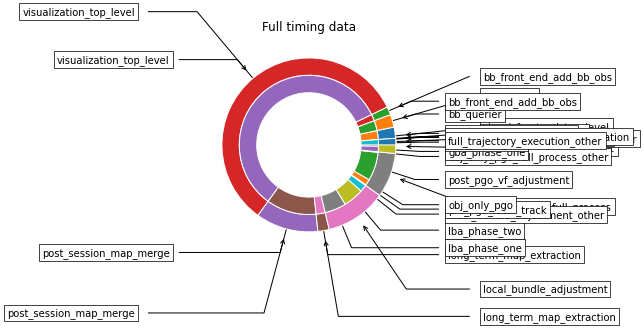

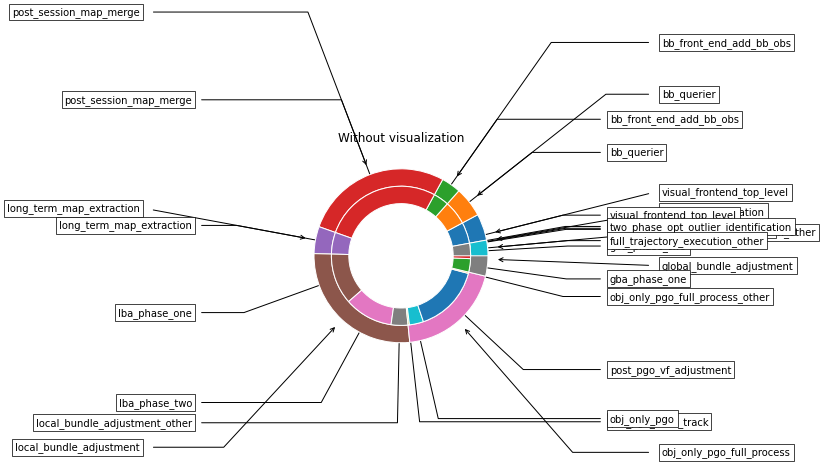

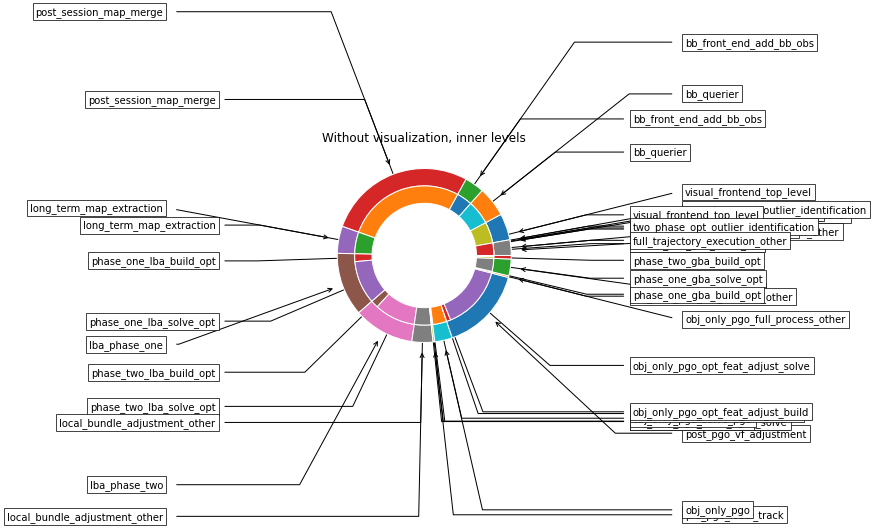

In [84]:
import matplotlib.pyplot as plt
import json
import numpy as np

def getNameAvgTimeAndInvocationsFromFileLine(line_from_file):
    words = line_from_file.split()
    preceding_timer_name_word = "for"
    
    timerName = 0
    timerAvgTime = 0
    timerInvocations = 0
    
    words_after_for = 0
    found_for = False
    for indiv_word in words:
        if (found_for):
            words_after_for += 1
            if (words_after_for == 1):
                timerName = indiv_word
            elif (words_after_for == 7):
                timerAvgTime = float(indiv_word)
            elif (words_after_for == 11):
                timerInvocations = int(indiv_word)
        else:
            if indiv_word == preceding_timer_name_word:
                found_for = True
                
    return (timerName, timerAvgTime, timerInvocations)

def getTimerDataFromLogFile(log_file_name):
    query_string = "Run-time stats for"
    log_file_obj = open(log_file_name, 'r')
    
    timerInfo = []
    
    for file_line in log_file_obj.readlines():
        if (query_string in file_line):
            timerInfo.append(getNameAvgTimeAndInvocationsFromFileLine(file_line))
            
    return timerInfo

def getTotalTimeForTimerData(timerData):
    totalTimeData = {}
    for timerEntry in timerData:
        totalTime = timerEntry[1] * timerEntry[2]
        totalTimeData[timerEntry[0]] = totalTime
    return totalTimeData


def createNestedValuesAndLabelsForRequestedTimers(totalTimeData, timerHierarchy):
    
#     if (not isinstance(timerHierarchy, dict)):
#         return (timerHierarchy, totalTimeData[timerHierarchy], totalTimeData[timerHierarchy], 1)
    
    
#     firstTime = True
            
#     labelsTree = {}
#     childValues = []
#     childrenSum = 0
#     totalTimeForNode = 0, 
#     maxDepth = 0
    
#     for timerNodeKey, timerNodeValue in timerHierarchy:
        
#         if (not firstTime):
#             print("Dictionaries should have only one entry (like JSON structure)")
        
#         firstTime = False
#         childLabels = []

#         for childNode in timerNodeValue:
#             childResults = createNestedValuesAndLabelsForRequestedTimers(totalTimeData, childNode)
#             childLabels.append(childResults(0))
#             childValues.append(childResults(1))
#             childrenSum += childResults(2)
#             maxDepth = max(maxDepth, childResults(3))
#         if (timerNodeKey in totalTimeData):
#             totalTimeForNode = totalTimeData[timerNodeKey]
#             otherTime = totalTimeForNode - childrenSum
#             otherLabel = timerNodeKey + "_other"
#             childLabels.append(otherLabel)
#         else:
#             totalTimeForNode = childrenSum
            
#         labelsTree = {timerNodeKey : childLabels}
        
        
#     return (labelsTree, childValues, totalTimeForNode, maxDepth + 1)

    if (not isinstance(timerHierarchy, dict)):
        return (timerHierarchy, totalTimeData[timerHierarchy], None, None, 0)
    
    
    firstTime = True
    childValues = []
    childrenSum = 0
    totalTimeForNode = 0
    maxDepth = 0
    
    for timerNodeKey, timerNodeValue in timerHierarchy.items():
        
        if (not firstTime):
            print("Dictonaries should have only one entry")
            
        firstTime = False
        
        childrenChildrenLabels = []
        childrenChildrenValues = []
        
        processedChildrenLabels = []
        processedChildrenValues = []
        
        childrenMaxDepths = []
        
        childNodeData = []
        
        currChildrenLabels = []
        currChildrenValues = []

        
        
        for childNode in timerNodeValue:
#             print("Getting data for node")
#             print(childNode)
            childResults = createNestedValuesAndLabelsForRequestedTimers(totalTimeData, childNode)
#             print(childResults)
            childNodeData.append(childResults)

            childMaxDepth = childResults[4]
            childrenSum += childResults[1]

            maxDepth = max(maxDepth, childMaxDepth)
            childrenMaxDepths.append(childMaxDepth)
            
        childrensChildrensLabels = [[] for _ in range(maxDepth)]
        childrensChildrensValues = [[] for _ in range(maxDepth)]
            
#         print("Child node data")
#         print(childNodeData)
                        
        if (timerNodeKey in totalTimeData):
            otherLabel = timerNodeKey + "_other"
            totalTimeForNode = totalTimeData[timerNodeKey]
            otherTime = totalTimeForNode - childrenSum
            
            otherChildResults = (otherLabel, otherTime, None, None, 0)
            childNodeData.append(otherChildResults)
            
#             print("Child node data after adding other")
#             print(childNodeData)
        else:
            totalTimeForNode = childrenSum
                    
        for childNodeDataEntry in childNodeData:
#             print("Child node data entry")
#             print(childNodeDataEntry)
            currChildrenLabels.append(childNodeDataEntry[0])
            currChildrenValues.append(childNodeDataEntry[1])
#             print(currChildrenValues)
            
            childrenLabelsForCurrChildren = childNodeDataEntry[2]
            childrenValuesForCurrChildren = childNodeDataEntry[3]
            
            if (childrenLabelsForCurrChildren is None):
                childrenLabelsForCurrChildren = []
            if (childrenValuesForCurrChildren is None):
                childrenValuesForCurrChildren = []
            
            childMaxDepth = childNodeDataEntry[4]
            
            while (len(childrenLabelsForCurrChildren)  < maxDepth):
                if (len(childrenLabelsForCurrChildren) == 0):
                    childrenLabelsForCurrChildren = [[childNodeDataEntry[0]]]
                    childrenValuesForCurrChildren = [[childNodeDataEntry[1]]]
                else:
                    childrenLabelsForCurrChildren.append(childrenLabelsForCurrChildren[-1])                                 
                    childrenValuesForCurrChildren.append(childrenValuesForCurrChildren[-1])    

            for i in range(maxDepth):
                childrensChildrensLabels[i].extend(childrenLabelsForCurrChildren[i])
                childrensChildrensValues[i].extend(childrenValuesForCurrChildren[i])
                    
#             print("Extended labels/values list for child " + childNodeDataEntry[0])
#             print(childrenLabelsForCurrChildren)
#             print(childrenValuesForCurrChildren)

#             print("Updated childrens children list for " + timerNodeKey + " after adding " + childNodeDataEntry[0])
#             print(childrensChildrensLabels)
#             print(childrensChildrensValues)
                                                                        
        processedChildrenLabels = [currChildrenLabels]
        if (len(childrensChildrensLabels) != 0):
            processedChildrenLabels.extend(childrensChildrensLabels)
                    
        processedChildrenValues = [currChildrenValues]        
        if (len(childrensChildrensLabels) != 0):
            processedChildrenValues.extend(childrensChildrensValues)
            
#         print("Labels and values for children of " + timerNodeKey)
#         print(json.dumps(processedChildrenLabels, indent=4))
#         print(json.dumps(processedChildrenValues, indent=4))
        
        return (timerNodeKey, totalTimeForNode, processedChildrenLabels, processedChildrenValues, maxDepth+1)
            
    
    

timerHierarchy = {"full_trajectory_execution":[
    "visual_frontend_top_level", "bb_querier", "bb_front_end_add_bb_obs", "visualization_top_level", 
    "post_session_map_merge", "long_term_map_extraction",
    {"local_bundle_adjustment":[
        {"lba_phase_one":["phase_one_lba_build_opt","phase_one_lba_solve_opt"]},
        {"lba_phase_two":["phase_two_lba_build_opt", "phase_two_lba_solve_opt"]}
    ]}, 
    {"obj_only_pgo_full_process":[
        {"pre_pgo_local_track":["obj_only_pgo_local_track_build", "obj_only_pgo_local_track_solve"]},
        {"obj_only_pgo":["obj_only_pgo_build_pgo","obj_only_pgo_solve_pgo"]},
        {"post_pgo_vf_adjustment":[
            "obj_only_pgo_manual_feat_adjust",
            "obj_only_pgo_opt_feat_adjust_build",
            "obj_only_pgo_opt_feat_adjust_solve"
        ]}
    ]},
    {"global_bundle_adjustment":[
        {"gba_phase_one":["phase_one_gba_build_opt","phase_one_gba_solve_opt"]},
        {"gba_phase_two":["phase_two_gba_build_opt","phase_two_gba_solve_opt"]}
    ]},
    {"outlier_identification":["post_opt_residual_compute", "two_phase_opt_outlier_identification"]}]
}

# timerHierarchy = {"global_bundle_adjustment":[
#         {"gba_phase_one":["phase_one_gba_build_opt","phase_one_gba_solve_opt"]},
#         {"gba_phase_two":["phase_two_gba_build_opt","phase_two_gba_solve_opt"]}
#     ]}


log_file_root_dir="/home/amanda/rosbags/ellipsoid_slam/eer_jackal/ut_vslam_results/copied_from_server/amazon_0523_v0/base7/"
bag_id="5__2023_05_16_15_02_33"
log_suffix="/logs/offline_object_visual_slam_main.INFO"

# log_file_name="/home/amanda/Downloads/0__2023_05_11_18_35_54_offline_object_visual_slam_main.INFO"
log_file_name=log_file_root_dir + bag_id + log_suffix

rawTimerData = getTimerDataFromLogFile(log_file_name)
cumulativeTimerData = getTotalTimeForTimerData(rawTimerData)
print("Cumulative time for each timer")
print(json.dumps(cumulativeTimerData, indent=4))
hierarchicalTimingData = createNestedValuesAndLabelsForRequestedTimers(cumulativeTimerData, timerHierarchy)

# print(hierarchicalTimingData)

fig, ax = plt.subplots()


# labelsData = hierarchicalTimingData(0)
# timeData = hierarchicalTimingData(1)
# maxDepth = hierarchicalTimingData(3)

labelsLists = hierarchicalTimingData[2]
timeDataLists = hierarchicalTimingData[3]
maxDepth = hierarchicalTimingData[4]

# labeslByDepth = []
# timesByDepth = []

print("Bag: " + bag_id)
totalTimeInMin = hierarchicalTimingData[1] / 60000
print("Total time: " + str(totalTimeInMin) + " min")


visualizationName = "visualization_top_level"
if ((len(labelsLists) > 0) and (visualizationName in labelsLists[0])):
    visIndex = labelsLists[0].index(visualizationName)
    visTimeMs = timeDataLists[0][visIndex]
    timeWithoutVisInMin = visTimeMs / 60000
    print("Total time minus visualization: " + str(timeWithoutVisInMin) + " min")

ax.set_title("Full timing data")

size = 0.2
for depth in range(maxDepth - 1):
    labelsForDepth = labelsLists[depth]
    timesForDepth = timeDataLists[depth]
    
#     wedges, texts = ax.pie(timesForDepth, radius=1 - (depth * size), labels=labelsForDepth,
#            wedgeprops=dict(width=size, edgecolor='w'))
    
    wedges, texts = ax.pie(timesForDepth, radius=1 - (depth * size), 
       wedgeprops=dict(width=size, edgecolor='w'))
    


    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))  * (1 - (depth * size))
        x = np.cos(np.deg2rad(ang)) * (1 - (depth * size))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        arrow_args = dict(arrowstyle="->")
        shrinkVal = 10*(1 - (2*depth * size))
        kw["arrowprops"].update({"connectionstyle": connectionstyle,"arrowstyle":"->", "shrinkA":shrinkVal,"shrinkB":shrinkVal})
        ax.annotate(labelsForDepth[i], xy=(x, y), xytext=(2*np.sign(x) * (1 - (depth * size)), 2*y*(1 - (depth * size))),
                    horizontalalignment=horizontalalignment, **kw)
    
    
#     handler = PieEventHandler(p[0])


# plt.legend()

    
plt.show()


fig2, ax2 = plt.subplots()


ax2.set_title("Without visualization")

for depth in range(maxDepth-1):

    labelsForDepth = labelsLists[depth][:]
    timesForDepth = timeDataLists[depth][:]
    
    if (visualizationName in labelsForDepth):
        visualizationIndex = labelsForDepth.index(visualizationName)
        del labelsForDepth[visualizationIndex]
        del timesForDepth[visualizationIndex]

        
    wedges, texts = ax2.pie(timesForDepth, radius=1 - (depth * size), 
       wedgeprops=dict(width=size, edgecolor='w'))
    

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))  * (1 - (depth * size))
        x = np.cos(np.deg2rad(ang)) * (1 - (depth * size))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        arrow_args = dict(arrowstyle="->")
        shrinkVal = 10*(1 - (2*depth * size))
        kw["arrowprops"].update({"connectionstyle": connectionstyle,"arrowstyle":"->", "shrinkA":shrinkVal,"shrinkB":shrinkVal})
        ax2.annotate(labelsForDepth[i], xy=(x, y), xytext=(3*np.sign(x) * (1 - (depth * size)), 3*y*(1 - (depth * size))),
                    horizontalalignment=horizontalalignment, **kw)
#     (1-(depth * size))
plt.show



fig3, ax3 = plt.subplots()

ax3.set_title("Without visualization, inner levels")

for depth in range(maxDepth-1):

    labelsForDepth = labelsLists[depth + 1][:]
    timesForDepth = timeDataLists[depth + 1][:]
    
    if (visualizationName in labelsForDepth):
        visualizationIndex = labelsForDepth.index(visualizationName)
        del labelsForDepth[visualizationIndex]
        del timesForDepth[visualizationIndex]

        
    wedges, texts = ax3.pie(timesForDepth, radius=1 - (depth * size), 
       wedgeprops=dict(width=size, edgecolor='w'))
    

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))  * (1 - (depth * size))
        x = np.cos(np.deg2rad(ang)) * (1 - (depth * size))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        arrow_args = dict(arrowstyle="->")
        shrinkVal = 10*(1 - (2*depth * size))
        kw["arrowprops"].update({"connectionstyle": connectionstyle,"arrowstyle":"->", "shrinkA":shrinkVal,"shrinkB":shrinkVal})
        ax3.annotate(labelsForDepth[i], xy=(x, y), xytext=(3*np.sign(x) * (1 - (depth * size)), 3*y*(1 - (depth * size))),
                    horizontalalignment=horizontalalignment, **kw)
#     (1-(depth * size))
plt.show()